In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew
from scipy.stats.mstats import normaltest

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Supermarket%20store%20branches%20sales%20analysis/Stores.csv")
data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [3]:
data.shape

(896, 5)

In [4]:
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [5]:
data = data.drop(['Store ID '], axis= 1)

In [6]:
data.isnull().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [7]:
data.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

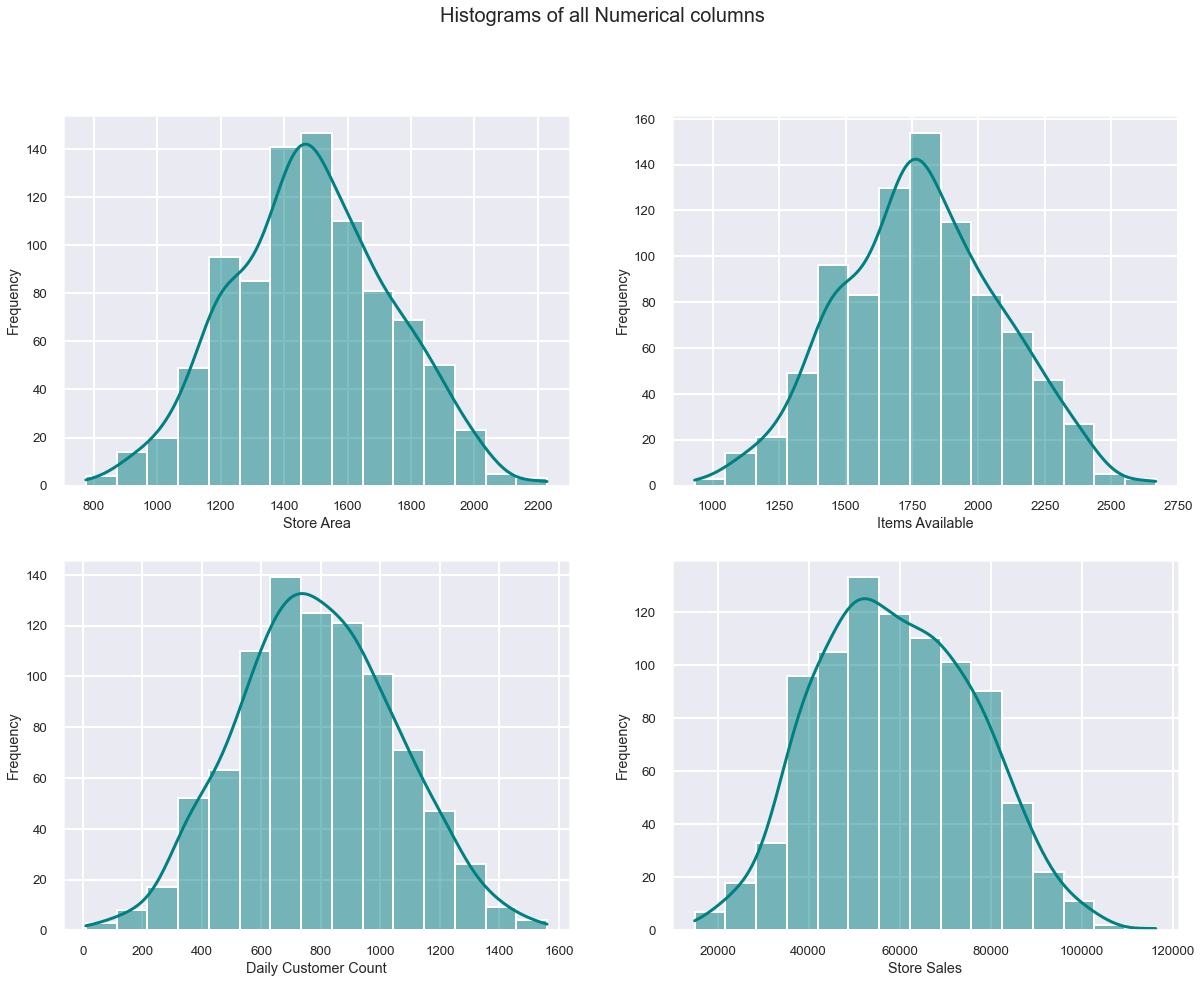

In [8]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(2, 2, figsize= (20, 15))

plt.suptitle('Histograms of all Numerical columns', fontsize = 20)

ax1 = sns.histplot(x = data['Store_Area'], color= 'teal', ax= ax[0, 0], bins= 15, kde= True)
ax1.set(xlabel= 'Store Area', ylabel= 'Frequency')

ax2 = sns.histplot(x = data['Items_Available'], color= 'teal', ax= ax[0, 1], bins= 15, kde= True)
ax2.set(xlabel= 'Items Available', ylabel= 'Frequency')

ax3 = sns.histplot(x = data['Daily_Customer_Count'], color= 'teal', ax= ax[1, 0], bins= 15, kde= True)
ax3.set(xlabel= 'Daily Customer Count', ylabel= 'Frequency')

ax4 = sns.histplot(x = data['Store_Sales'], color= 'teal', ax= ax[1, 1], bins= 15, kde= True)
ax4.set(xlabel= 'Store Sales', ylabel= 'Frequency')

plt.show()

In [9]:
skew_df = pd.DataFrame(data= data.columns, columns= ['Features'])
skew_df['Skew'] = skew_df['Features'].apply(lambda feature: skew(data[feature]))
skew_df['Abs Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Features,Skew,Abs Skew,Skewed
0,Store_Area,0.030316,0.030316,False
1,Items_Available,0.034382,0.034382,False
2,Daily_Customer_Count,0.074508,0.074508,False
3,Store_Sales,0.148544,0.148544,False


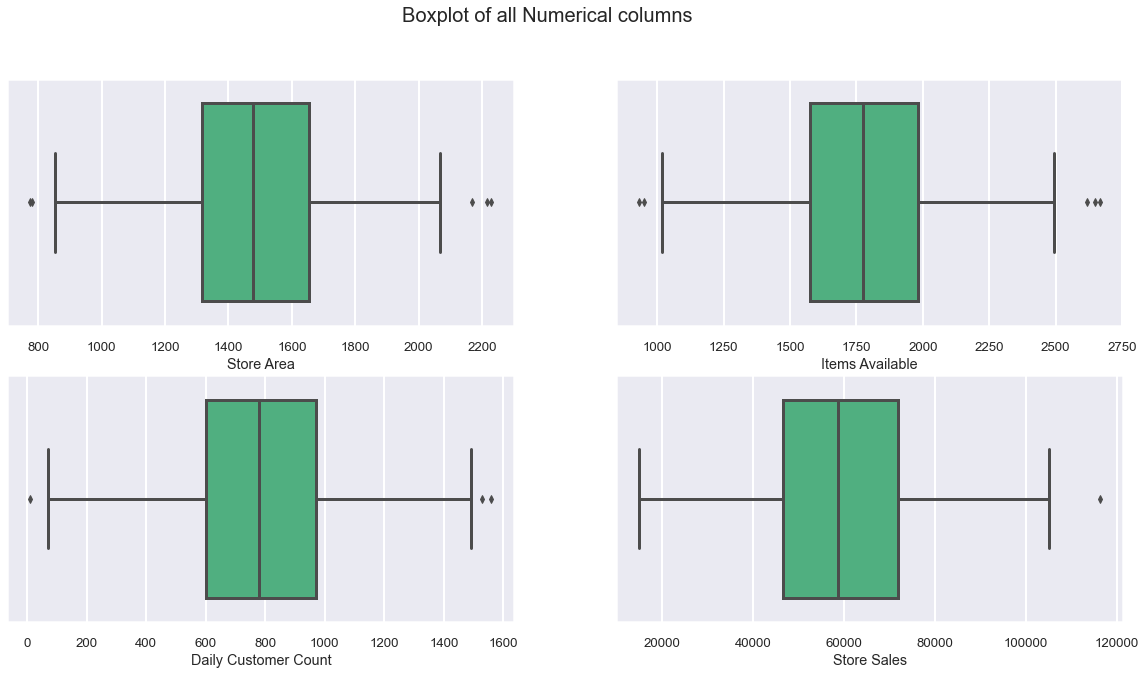

In [10]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(2, 2, figsize= (20, 10))

plt.suptitle('Boxplot of all Numerical columns', fontsize = 20)

ax1 = sns.boxplot(x = data['Store_Area'], color= '#40bf80', ax= ax[0, 0])
ax1.set(xlabel= 'Store Area')

ax2 = sns.boxplot(x = data['Items_Available'], color= '#40bf80', ax= ax[0, 1])
ax2.set(xlabel= 'Items Available')

ax3 = sns.boxplot(x = data['Daily_Customer_Count'], color= '#40bf80', ax= ax[1, 0])
ax3.set(xlabel= 'Daily Customer Count')

ax4 = sns.boxplot(x = data['Store_Sales'], color= '#40bf80', ax= ax[1, 1])
ax4.set(xlabel= 'Store Sales')

plt.show()

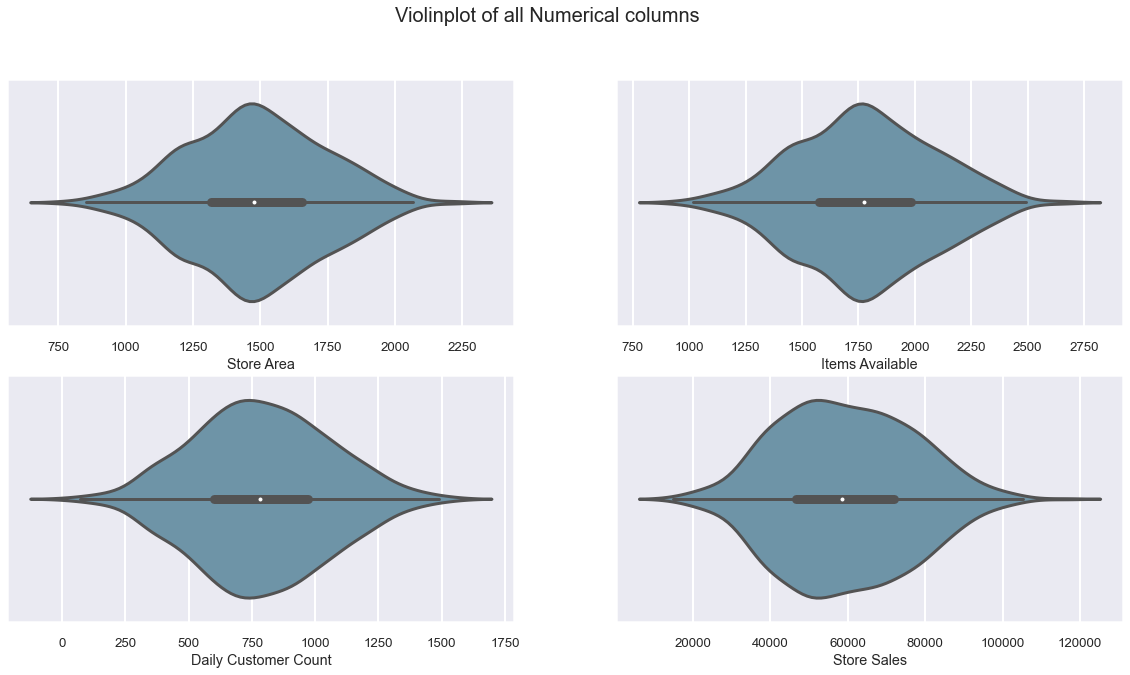

In [11]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(2, 2, figsize= (20, 10))

plt.suptitle('Violinplot of all Numerical columns', fontsize = 20)

ax1 = sns.violinplot(x = data['Store_Area'], color= '#6497b1', ax= ax[0, 0])
ax1.set(xlabel= 'Store Area')

ax2 = sns.violinplot(x = data['Items_Available'], color= '#6497b1', ax= ax[0, 1])
ax2.set(xlabel= 'Items Available')

ax3 = sns.violinplot(x = data['Daily_Customer_Count'], color= '#6497b1', ax= ax[1, 0])
ax3.set(xlabel= 'Daily Customer Count')

ax4 = sns.violinplot(x = data['Store_Sales'], color= '#6497b1', ax= ax[1, 1])
ax4.set(xlabel= 'Store Sales')

plt.show()

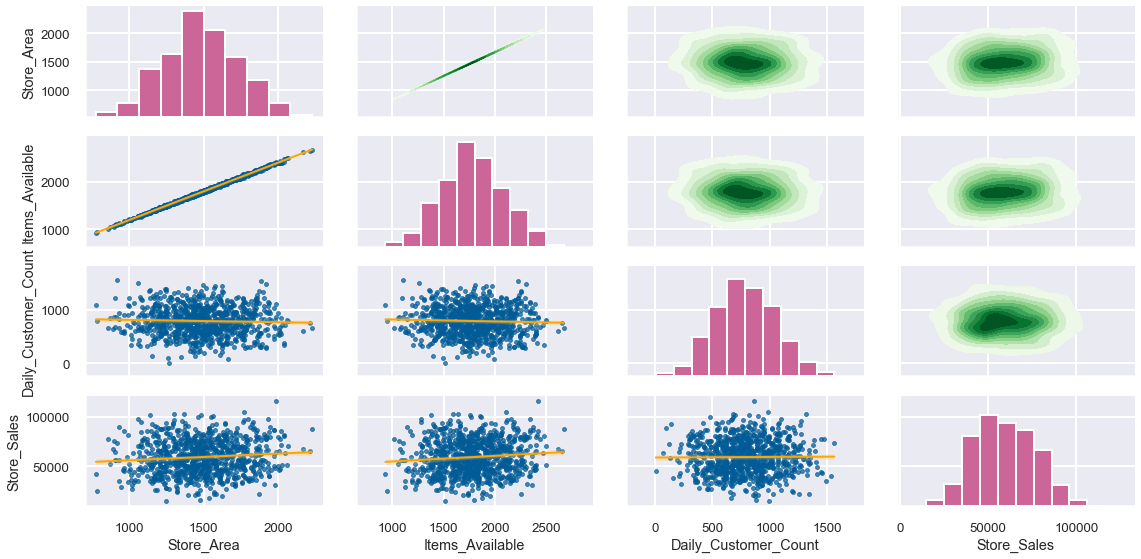

In [12]:
grid = sns.PairGrid(data, vars=['Store_Area', 'Items_Available', 'Daily_Customer_Count','Store_Sales'],
                    height=2, aspect = 2)

grid = grid.map_diag(plt.hist, color = '#cc6699')
grid = grid.map_lower(sns.regplot, scatter_kws = {'s': 15, 'alpha': 0.7, 'color': '#005b96'}, 
                      line_kws = {'color':'orange', 'linewidth': 2})
grid = grid.map_upper(sns.kdeplot, n_levels = 10, cmap= 'Greens', shade = True)

plt.show()